In [1]:
import numpy as np
import pandas as pd 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path="/content/gdrive/My Drive/Thesis/Data - Sheet1.csv"
data = pd.read_csv(path)
data.head()

,SL.,Comment,Hate,Type
0,1,Kanki ki der Allah sob samoy valo rake,Yes,Others
1,2,khanki akta,Yes,Sexual
2,3,Ore saniliyon,Yes,Sexual
3,4,Bokachoda Shangbadik,Yes,Slang
4,5,Balda dekhaiche,Yes,Slang


In [3]:
!pip install -q wordcloud
import wordcloud
import nltk
import sklearn.metrics as metrics
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
import matplotlib.pyplot as plt
import io
import unicodedata
import string
import re
import pandas as pd
import numpy as np
from sklearn import metrics
import itertools
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
data['Hate'].isnull().sum()

0

In [9]:
x = data.drop(['Hate','Type'], axis=1)
y = data['Hate']

In [10]:
print(x.shape)
print(y.shape)

(5000, 2)
(5000,)


In [11]:
texts=x.copy()

In [12]:
texts['Comment'][2913]

'Notun deksen to j meyra harrest kortese kono chele k tai jonno e,jokhon rape hoy,alakay kono mey k harrest kora hoy!!!'

In [13]:
import re
# Cleaning the texts
corpus = []
for i in range(0,len(texts)):
    review = re.sub('[^a-zA-Z]', ' ',str(texts['Comment'][i]))
    review = review.lower()
    review = review.split()
    review = ' '.join(review)
    corpus.append(review)

In [14]:
corpus[2913]

'notun deksen to j meyra harrest kortese kono chele k tai jonno e jokhon rape hoy alakay kono mey k harrest kora hoy'

In [16]:
#importing
from sklearn.feature_extraction.text import TfidfVectorizer
# TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf.fit_transform(corpus).toarray()

In [15]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

accuracy:   0.718
precision: 0.721834976988823
recall: 0.718
fscore: 0.7098893567221707
support: None
Confusion matrix, without normalization


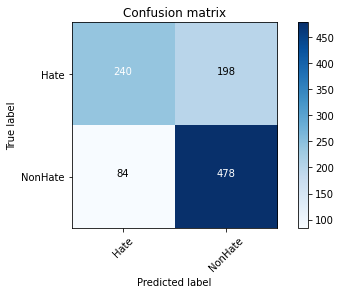

In [18]:
from sklearn.linear_model import LogisticRegression
lgc=LogisticRegression()
lgc.fit(X_train, y_train)
pred = lgc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred,average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Hate', 'NonHate'])

accuracy:   0.73
precision: 0.7369220904165459
recall: 0.731
fscore: 0.7227331795173182
support: None
Confusion matrix, without normalization


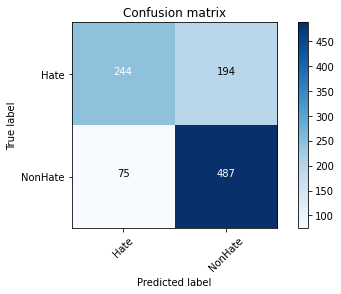

In [19]:
### MultinomialNB Algorithm

from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(X_train, y_train)
pred = MNB.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred, average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Hate', 'NonHate'])

accuracy:   0.66
precision: 0.6670362332757186
recall: 0.658
fscore: 0.6592965407127183
support: None
Confusion matrix, without normalization


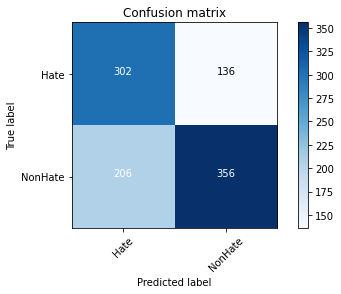

In [20]:
### GaussianNB Algorithm

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
pred = GNB.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred,average='weighted',zero_division=0)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Hate', 'NonHate'])

accuracy:   0.638
precision: 0.6411813088871913
recall: 0.638
fscore: 0.6149079322933954
support: None
Confusion matrix, without normalization


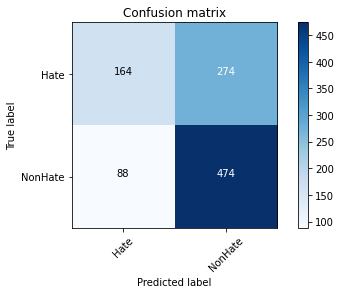

In [21]:
### AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier()
ada.fit(X_train, y_train)
pred = ada.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred,average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Hate', 'NonHate'])

accuracy:   0.61
precision: 0.6588222222222222
recall: 0.61
fscore: 0.5325727856630679
support: None
Confusion matrix, without normalization


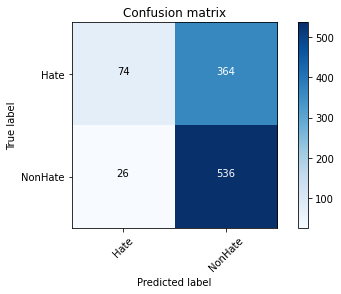

In [22]:
### DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(max_depth=3)
dc.fit(X_train, y_train)
pred = dc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred,average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Hate', 'NonHate'])

accuracy:   0.690
precision: 0.6899016786142047
recall: 0.69
fscore: 0.6826891718886868
support: None
Confusion matrix, without normalization


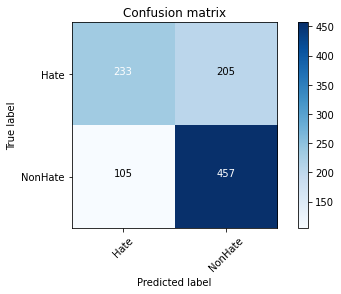

In [23]:
### RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred,average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Hate', 'NonHate'])

accuracy:   0.730
precision: 0.7290843626628711
recall: 0.73
fscore: 0.727187267465895
support: None
Confusion matrix, without normalization


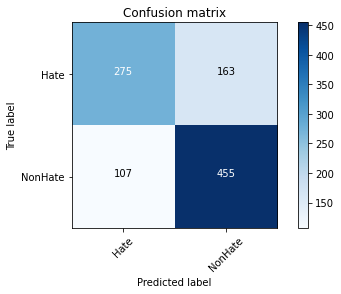

In [24]:
from sklearn.svm import SVC
svc = SVC(C=1,kernel='linear',gamma = 'auto',probability=True)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred,average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Hate', 'NonHate'])